### Importing the Dependencies

In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

### Data Collection and Processing

In [143]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart_disease_data.csv')

In [144]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [145]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [146]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [147]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [148]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [149]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [150]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### 1 --> Defective Heart

### 0 --> Healthy Heart

### Splitting the Features and Target

In [151]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [152]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [153]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


### Splitting the Data into Training data & Test Data

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [155]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


### Model Training

### Logistic Regression

In [156]:
# Split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, Y_train, test_size=0.3)

best_precision = 0  # Initialize to keep track of the best precision
best_C = None       # Initialize to store the best C value

for i in [10**-4, 10**-2, 10**0, 10**4]:
    model = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr', C=i)
    
    # Let the model learn on training data
    model.fit(X_tr, y_tr)
    
    # Predict the response
    pred = model.predict(X_cv)
    
    # Calculate precision
    precision = precision_score(y_cv, pred, labels=[0, 1], average='binary')  # Assuming binary classification
    
    print('\nCV precision_score for C = ' + str(i) + ' is ' + str(precision))
    
    # Update best_precision and best_C if current precision is better
    if precision > best_precision:
        best_precision = precision
        best_C = i

print("\nBest C value:", best_C)
print("Best precision:", best_precision)





CV precision_score for C = 0.0001 is 0.6739130434782609

CV precision_score for C = 0.01 is 0.6888888888888889

CV precision_score for C = 1 is 0.7872340425531915

CV precision_score for C = 10000 is 0.8

Best C value: 10000
Best precision: 0.8


In [157]:
# After finding the best C value, retrain the model on the entire training dataset
final_model = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr', C=best_C)
final_model.fit(X_train, Y_train)

# Prediction opn test data
pred= final_model.predict(X_test)

### Model Evaluation

### Confusion matrix

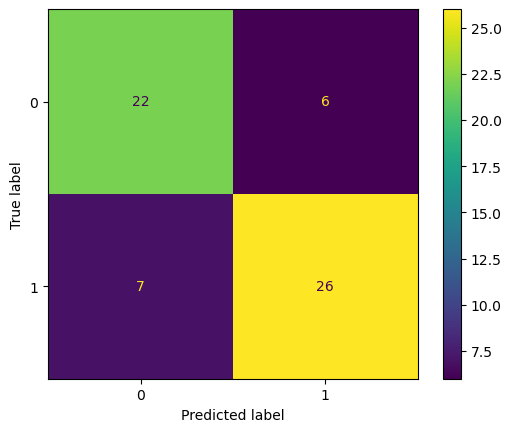

In [158]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Accuracy Score

In [159]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [160]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8388429752066116


In [161]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [162]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8032786885245902


### Building a Predictive System

In [163]:
import pickle

saved_model = pickle.dump(final_model, open('final_model.pkl', 'wb'))
logistic_from_pickle = pickle.load(open('final_model.pkl', 'rb'))

# Set feature_names_in_ to None to suppress the warning
logistic_from_pickle.feature_names_in_ = None

# PREDICTING ON NEW DATA
new_data = [[67, 0, 3, 120, 250, 1, 0, 170, 0, 1.5, 0, 0, 1]]  # Input data as a list of features
prediction = logistic_from_pickle.predict(new_data)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [164]:
# PREDICTING ON NEW DATA
new_data = [[57, 0, 0, 140, 241, 0, 1, 123, 1, 0.2, 1, 0, 3]]  # Input data as a list of features
prediction = logistic_from_pickle.predict(new_data)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
